In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
import numpy as np

from sklearn.linear_model import LinearRegression

read in the data

In [3]:
# read data into a DataFrame
# data = pd.read_csv('RRCA_baseflow.csv', index_col=0)
data = pd.read_csv('RRCA_baseflow.csv')
data.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,711767,40,1798990,14561280,2.26,20.68,0.0,12.129464
1,711797,40,1798990,14561280,0.05,20.68,0.0,15.497054
2,711828,40,1798990,14561280,0.22,20.68,0.0,16.007097
3,711859,40,1798990,14561280,0.00,29.07,0.0,15.877097
4,711887,40,1798990,14561280,0.16,29.07,0.0,15.828305


In [4]:
# print the shape of the DataFrame
data.shape

(15591, 8)

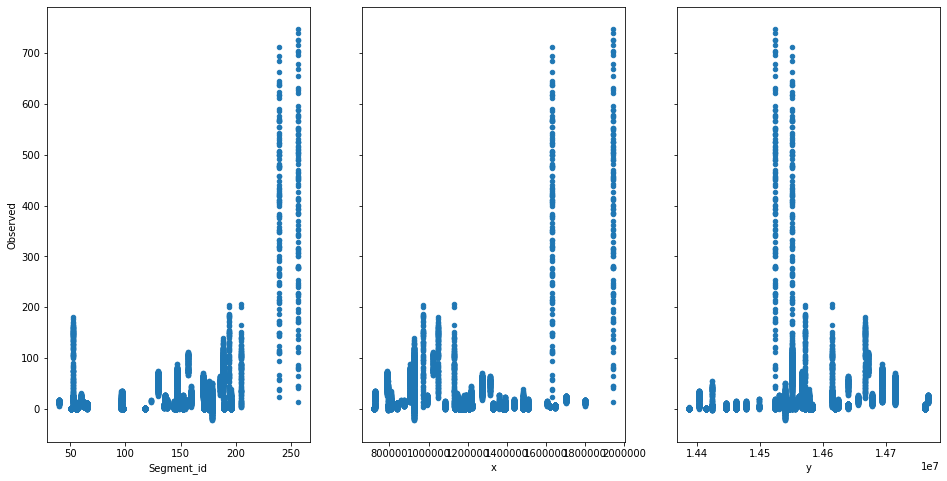

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Segment_id', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='x', y='Observed', ax=axs[1])
data.plot(kind='scatter', x='y', y='Observed', ax=axs[2])

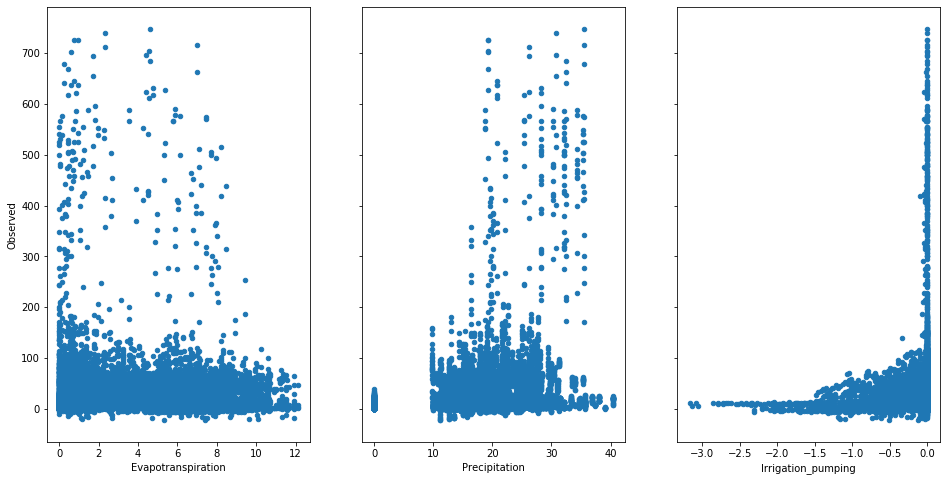

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
data.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

In [7]:
df_seg144 = data[data.Segment_id==144]

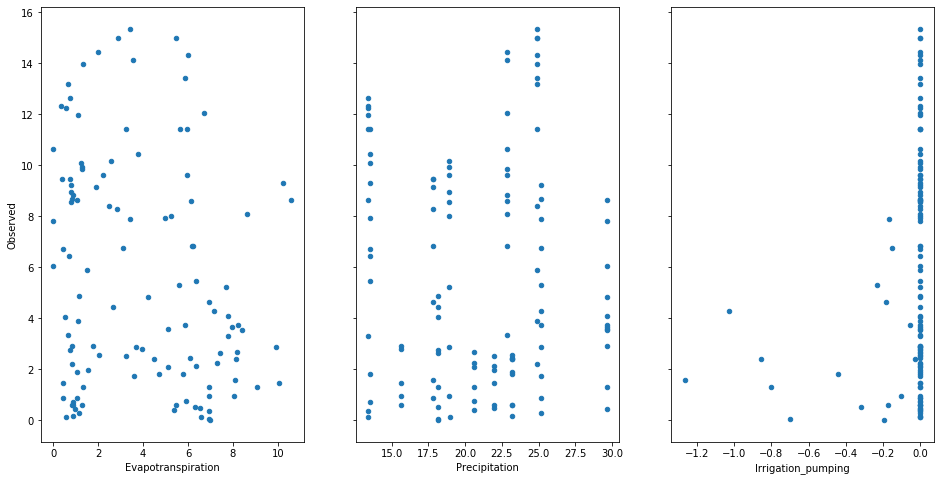

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True)
df_seg144.plot(kind='scatter', x='Evapotranspiration', y='Observed', ax=axs[0], figsize=(16, 8))
df_seg144.plot(kind='scatter', x='Precipitation', y='Observed', ax=axs[1])
df_seg144.plot(kind='scatter', x='Irrigation_pumping', y='Observed', ax=axs[2])

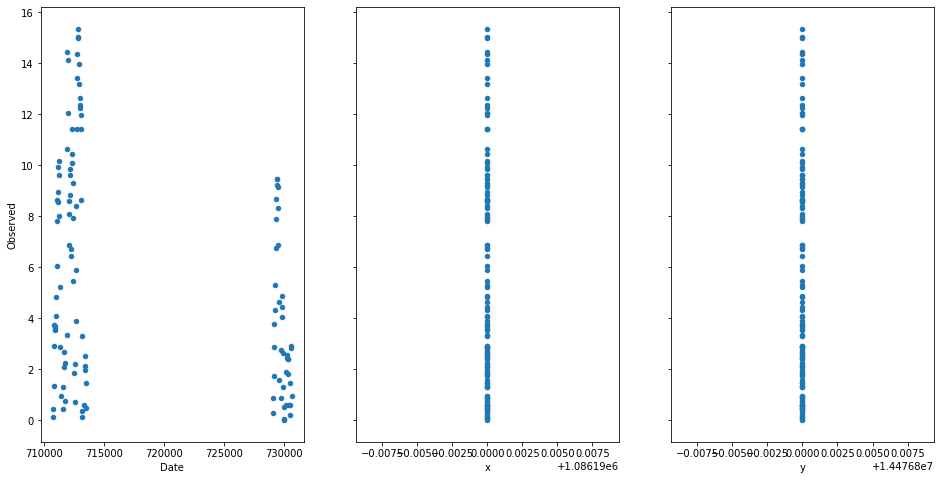

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df_seg144.plot(kind='scatter', x='Date', y='Observed', ax=axs[0], figsize=(16, 8))
df_seg144.plot(kind='scatter', x='x', y='Observed', ax=axs[1])
df_seg144.plot(kind='scatter', x='y', y='Observed', ax=axs[2])

In [10]:
df_seg144.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
7442,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
7443,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
7444,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
7445,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
7446,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [11]:
data_target = df_seg144.iloc[:,-1].values
data_ip = df_seg144.loc[:, data.columns != 'Observed'].values

In [12]:
X,y = scale(data_ip), data_target


In [13]:

missing_values = X == np.NaN
X[missing_values == True]

array([], dtype=float64)

In [14]:
# LinReg = LinearRegression(normalize = True)
# LinReg.fit(X,y)
# print(LinReg.score(X,y))

In [15]:
# create X and y
# feature_cols = ['Irrigation_pumping']
# X = df_seg144[feature_cols]
# y = df_seg144.Observed

# # follow the usual sklearn pattern: import, instantiate, fit
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(X, y)

# # print intercept and coefficients
# print(lm.intercept_)
# print(lm.coef_)

## Segment 144

### Irrigation pumpinig variable

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=df_seg144).fit()
# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
# display(lm.conf_int())
# print the p-values for the model coefficients
# lm.pvalues
# print a summary of the fitted model
lm.summary()

Intercept             5.887000
Irrigation_pumping    4.749874
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.607
Date:                Wed, 11 Mar 2020   Prob (F-statistic):             0.0195
Time:                        12:10:42   Log-Likelihood:                -339.38
No. Observations:                 118   AIC:                             682.8
Df Residuals:                     116   BIC:                             688.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.8870      0.415     14.197      0.000       5.066       6.708
Irrigation_pumping     4.7499      2.006      2.368      0.020       0.777       8.723
==============================================================================
Omnibus:                       17.818   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.432
Skew:                           0.454   Prob(JB):                       0.0148
Kurtosis:                       2.056   Cond. No.                         5.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

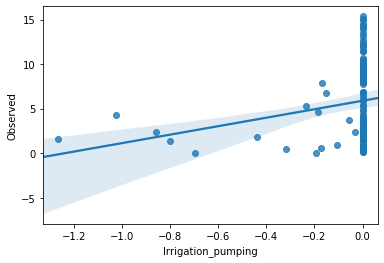

In [17]:
import seaborn as sns

plt.figure()
ax = sns.regplot(x='Irrigation_pumping', y='Observed', data=df_seg144)


### Precipitatin (Seg 144)

In [18]:
lm = smf.ols(formula='Observed ~ Precipitation', data=df_seg144).fit()
# print the coefficients

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.08178
Date:                Wed, 11 Mar 2020   Prob (F-statistic):              0.775
Time:                        12:10:44   Log-Likelihood:                -342.13
No. Observations:                 118   AIC:                             688.3
Df Residuals:                     116   BIC:                             693.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1222      1.813      3.377      0.001       2.531       9.713
Precipitation    -0.0241      0.084     -0.286      0.775      -0.191       0.143
==============================================================================
Omnibus:                       16.890   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.474
Skew:                           0.527   Prob(JB):                      0.00877
Kurtosis:                       2.097   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

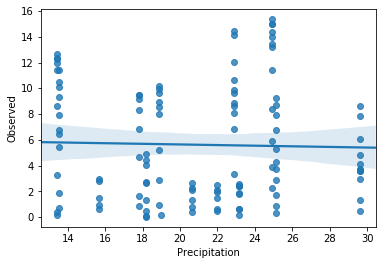

In [19]:
plt.figure()
ax = sns.regplot(x='Precipitation', y='Observed', data=df_seg144)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     4.743
Date:                Wed, 11 Mar 2020   Prob (F-statistic):             0.0314
Time:                        12:10:45   Log-Likelihood:                -339.80
No. Observations:                 118   AIC:                             683.6
Df Residuals:                     116   BIC:                             689.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.7806      0.667     10.159      0.000       5.459       8.103
Evapotranspiration    -0.2958      0.136     -2.178      0.031      -0.565      -0.027
==============================================================================
Omnibus:                       11.398   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.582
Skew:                           0.481   Prob(JB):                       0.0226
Kurtosis:                       2.215   Cond. No.                         8.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

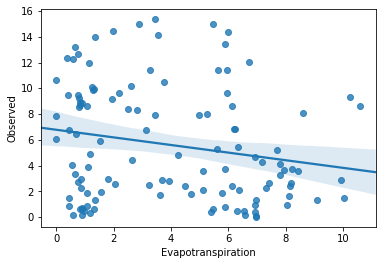

In [20]:
lm = smf.ols(formula='Observed ~ Evapotranspiration', data=df_seg144).fit()
# print the coefficients

display(lm.summary())
plt.figure()
ax = sns.regplot(x='Evapotranspiration', y='Observed', data=df_seg144)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     16.42
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           9.22e-05
Time:                        12:10:46   Log-Likelihood:                -334.36
No. Observations:                 118   AIC:                             672.7
Df Residuals:                     116   BIC:                             678.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.4763     32.298      4.226      0.000      72.507     200.446
Date          -0.0002    4.5e-05     -4.052      0.000      -0.000   -9.31e-05
==============================================================================
Omnibus:                       14.886   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.994
Skew:                           0.294   Prob(JB):                       0.0499
Kurtosis:                       2.066   Cond. No.                     6.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

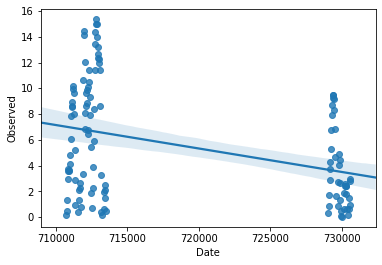

In [21]:
lm = smf.ols(formula='Observed ~ Date', data=df_seg144).fit()
# print the coefficients

display(lm.summary())
plt.figure()
ax = sns.regplot(x='Date', y='Observed', data=df_seg144)

## Segment 256

In [22]:
df_seg256 = data[data.Segment_id==256]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.801
Date:                Wed, 11 Mar 2020   Prob (F-statistic):             0.0969
Time:                        12:10:47   Log-Likelihood:                -788.46
No. Observations:                 119   AIC:                             1581.
Df Residuals:                     117   BIC:                             1586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.879e+04   1.15e+04     -1.639      0.104   -4.15e+04    3911.755
Date           0.0270      0.016      1.674      0.097      -0.005       0.059
==============================================================================
Omnibus:                       17.091   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.211
Skew:                          -0.136   Prob(JB):                       0.0739
Kurtosis:                       2.012   Cond. No.                     4.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

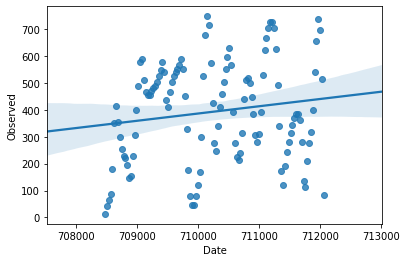

In [23]:
lm = smf.ols(formula='Observed ~ Date', data=df_seg256).fit()
# print the coefficients

display(lm.summary())
plt.figure()
ax = sns.regplot(x='Date', y='Observed', data=df_seg256)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.877
Date:                Wed, 11 Mar 2020   Prob (F-statistic):             0.0911
Time:                        12:10:48   Log-Likelihood:                -1296.3
No. Observations:                 240   AIC:                             2597.
Df Residuals:                     238   BIC:                             2604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3978.8188   2309.125      1.723      0.086    -570.115    8527.753
Date          -0.0055      0.003     -1.696      0.091      -0.012       0.001
==============================================================================
Omnibus:                       55.373   Durbin-Watson:                   3.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.270
Skew:                           0.794   Prob(JB):                     3.62e-08
Kurtosis:                       2.048   Cond. No.                     4.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

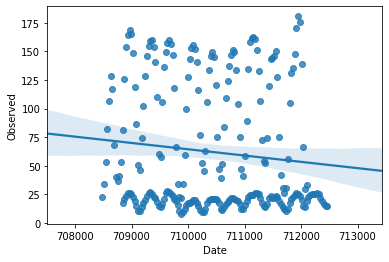

In [24]:
df_seg53 = data[data.Segment_id==53]
lm = smf.ols(formula='Observed ~ Date', data=df_seg53).fit()
# print the coefficients

display(lm.summary())
plt.figure()
ax = sns.regplot(x='Date', y='Observed', data=df_seg53)

# Model using all the variables

In [25]:
lm = smf.ols(formula='Observed ~ Irrigation_pumping + Evapotranspiration + Precipitation + Date', data=df_seg144).fit()
# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
display(lm.conf_int())
# print the p-values for the model coefficients
lm.pvalues
# print a summary of the fitted model
lm.summary()

Intercept             146.087165
Irrigation_pumping      0.060641
Evapotranspiration     -0.335124
Precipitation          -0.062138
Date                   -0.000192
dtype: float64

,0,1
Intercept,75.679806,216.494525
Irrigation_pumping,-4.295477,4.416760
Evapotranspiration,-0.607605,-0.062643
Precipitation,-0.216438,0.092161
Date,-0.000289,-0.000095


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     6.097
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           0.000177
Time:                        12:10:48   Log-Likelihood:                -330.64
No. Observations:                 118   AIC:                             671.3
Df Residuals:                     113   BIC:                             685.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            146.0872     35.538      4.111      0.000      75.680     216.495
Irrigation_pumping     0.0606      2.199      0.028      0.978      -4.295       4.417
Evapotranspiration    -0.3351      0.138     -2.437      0.016      -0.608      -0.063
Precipitation         -0.0621      0.078     -0.798      0.427      -0.216       0.092
Date                  -0.0002   4.91e-05     -3.908      0.000      -0.000   -9.46e-05
==============================================================================
Omnibus:                        4.911   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                3.227
Skew:                           0.233   Prob(JB):                        0.199
Kurtosis:                       2.338   Cond. No.                     6.81e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
lm = smf.ols(formula='Observed ~  Evapotranspiration + Date', data=df_seg144).fit()
# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
display(lm.conf_int())
# print the p-values for the model coefficients
lm.pvalues
# print a summary of the fitted model
lm.summary()

Intercept             143.009977
Evapotranspiration     -0.330599
Date                   -0.000189
dtype: float64

,0,1
Intercept,80.377194,205.642760
Evapotranspiration,-0.581864,-0.079335
Date,-0.000277,-0.000102


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Observed   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     12.02
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.83e-05
Time:                        12:10:49   Log-Likelihood:                -330.97
No. Observations:                 118   AIC:                             667.9
Df Residuals:                     115   BIC:                             676.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            143.0100     31.620      4.523      0.000      80.377     205.643
Evapotranspiration    -0.3306      0.127     -2.606      0.010      -0.582      -0.079
Date                  -0.0002    4.4e-05     -4.309      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        7.207   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                3.815
Skew:                           0.217   Prob(JB):                        0.148
Kurtosis:                       2.233   Cond. No.                     6.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Analysis of segment id to figure out which segments will be more effective. Clearly we can see that segment if between 130 and 200 have significant effect on baseflow. Hence, segments within this range can be used to analyse data individually.

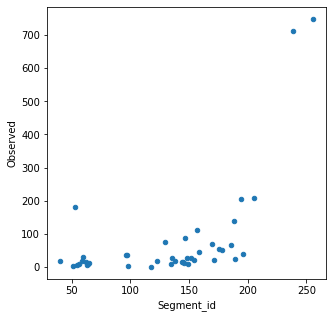

In [32]:
data = data.groupby(['Segment_id']).agg({'Observed':'sum'})
data.reset_index(drop=False,inplace=True)
data.plot(kind='scatter', x='Segment_id', y='Observed', figsize=(5, 5))

In [33]:
# create X and y
feature_cols = ['Segment_id']
X = data[feature_cols]
y = data.Observed

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-133.95469424515272
[1.59534497]


In [34]:
X_new = pd.DataFrame({'Segment_id': [40, 51, 53,55]})
display(X_new)

,Segment_id
0,40
1,51
2,53
3,55


In [35]:
lm.predict(X_new.values)

array([-70.14089526, -52.59210054, -49.40141059, -46.21072065])

In [36]:
X_new = pd.DataFrame({'Data': [data.Segment_id.min(), data.Segment_id.max()]})
X_new

,Data
0,40
1,256


In [37]:
preds = lm.predict(X_new)
preds

array([-70.14089526, 274.45361924])

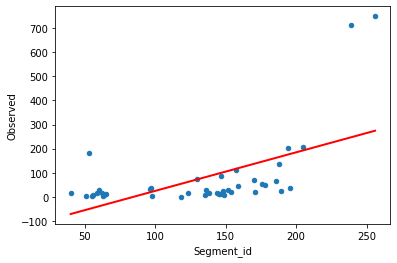

In [38]:
# first, plot the observed data
data.plot(kind='scatter', x='Segment_id', y='Observed')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

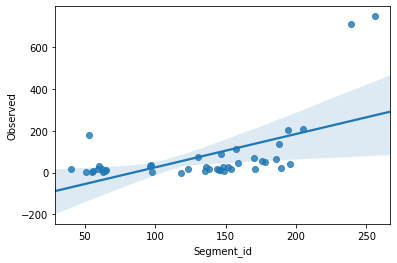

In [39]:
sns.regplot(x='Segment_id', y='Observed', data=data)

In [40]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Observed ~ Segment_id', data=data).fit()

# print the coefficients
display(lm.params)

# print the confidence intervals for the model coefficients
display(lm.conf_int())

Intercept    -133.954694
Segment_id      1.595345
dtype: float64

,0,1
Intercept,-240.697408,-27.211980
Segment_id,0.848985,2.341705


In [41]:
lm = smf.ols(formula='Observed ~ Segment_id', data=data).fit()
# print the p-values for the model coefficients
lm.pvalues

Intercept     0.01521
Segment_id    0.00010
dtype: float64

# R squared values

In [44]:
lm = LinearRegression()
lm.fit(data[['Segment_id']], data.Observed)
display(lm.score(data[['Segment_id']], data.Observed))

0.3181369878830679